In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fp = "029740.txt"

data = pd.read_csv(
    fp,
    delim_whitespace=True,
    na_values=["*", "**", "***", "****", "*****", "******"],
    usecols=["YR--MODAHRMN", "TEMP", "MAX", "MIN"],
    parse_dates=["YR--MODAHRMN"],
    index_col="YR--MODAHRMN",
)

In [ ]:
data.head()

,TEMP,MAX,MIN
YR--MODAHRMN,,,
1952-01-01 00:00:00,36.0,NaN,NaN
1952-01-01 06:00:00,37.0,NaN,34.0
1952-01-01 12:00:00,39.0,NaN,NaN
1952-01-01 18:00:00,36.0,39.0,NaN
1952-01-02 00:00:00,36.0,NaN,NaN


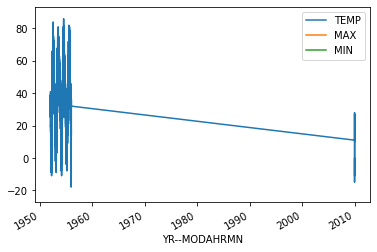

In [ ]:
ax = data.plot()

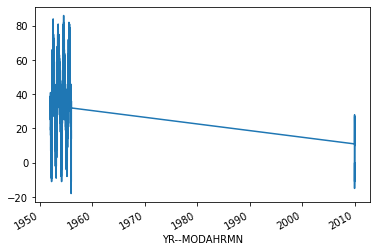

In [ ]:
oct1_temps = data["TEMP"].loc[data.index]
ax = oct1_temps.plot()

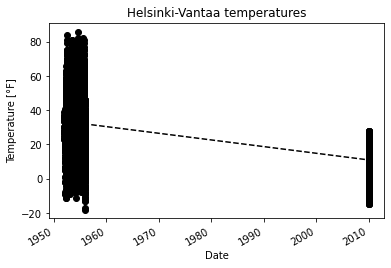

In [ ]:
ax = oct1_temps.plot(
    style="ko--",
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
)

In [ ]:
figsize=(12, 6)

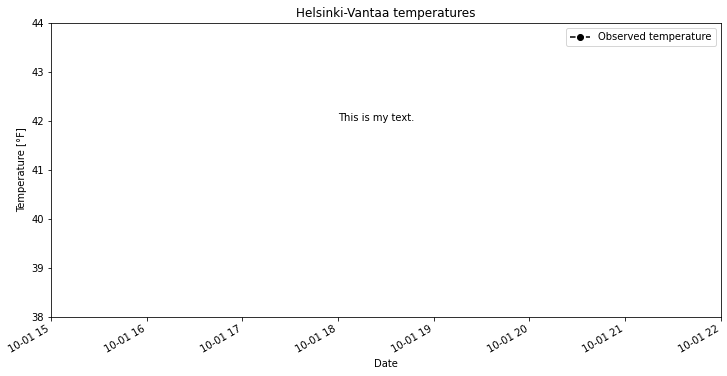

In [ ]:
from datetime import datetime

# Use xlim and ylim to define the axis ranges
xmin, xmax = datetime(2019, 10, 1, 15), datetime(2019, 10, 1, 22)
ymin, ymax = 38, 44

ax = oct1_temps.plot(
    style="ko--",
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
    xlim=[xmin, xmax],
    ylim=[ymin, ymax],
    label="Observed temperature",
    figsize=(12, 6),
)

# Add text to plot
x, y = "201910011800", 42
ax.text(x, y, "This is my text.")

# Display plot legend
ax.legend()

In [ ]:
pd.to_datetime("201910011300")

Timestamp('2019-10-01 13:00:00')

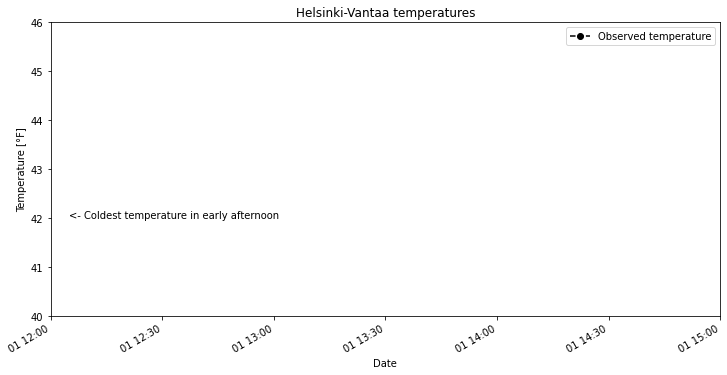

In [ ]:
start_time = pd.to_datetime("201910011200")
end_time = pd.to_datetime("201910011500")
cold_time = pd.to_datetime("201910011205")

# Adjust axis limits
ax = oct1_temps.plot(
    style="ko--",
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
    xlim=[start_time, end_time],
    ylim=[40.0, 46.0],
    label="Observed temperature",
    figsize=(12, 6),
)

# Add plot text
ax.text(cold_time, 42.0, "<- Coldest temperature in early afternoon")
ax.legend()

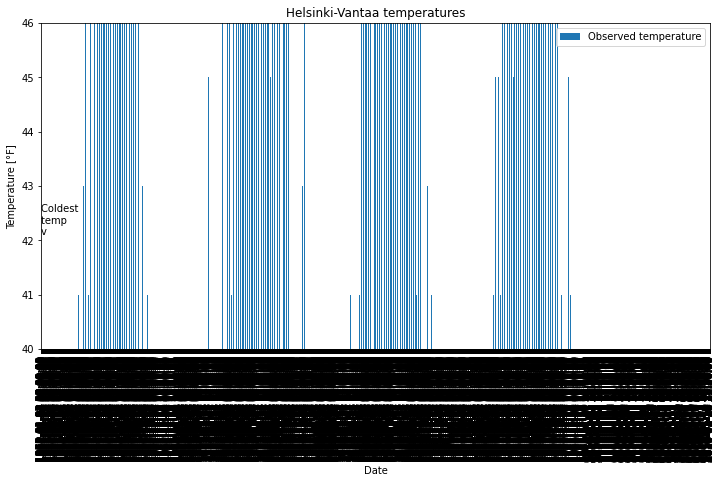

In [ ]:
oct1_afternoon = oct1_temps.loc[oct1_temps.index <= "201910011500"]

# Plot temperature data as a bar plot
ax = oct1_afternoon.plot(
    kind="bar",
    title="Helsinki-Vantaa temperatures",
    xlabel="Date",
    ylabel="Temperature [°F]",
    ylim=[40, 46],
    label="Observed temperature",
    figsize=(12, 6),
)

ax.text(0, 42.1, "Coldest \ntemp \nv")
ax.legend()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fp = "029740.txt"

data = pd.read_csv(
    fp,
    delim_whitespace=True,
    na_values=["*", "**", "***", "****", "*****", "******"],
    usecols=["YR--MODAHRMN", "TEMP", "MAX", "MIN"],
    parse_dates=["YR--MODAHRMN"],
    index_col="YR--MODAHRMN",
)

In [ ]:
new_names = {"TEMP": "TEMP_F"}
data = data.rename(columns=new_names)

In [ ]:
data.head()

,TEMP_F,MAX,MIN
YR--MODAHRMN,,,
1952-01-01 00:00:00,36.0,NaN,NaN
1952-01-01 06:00:00,37.0,NaN,34.0
1952-01-01 12:00:00,39.0,NaN,NaN
1952-01-01 18:00:00,36.0,39.0,NaN
1952-01-02 00:00:00,36.0,NaN,NaN


In [ ]:
print("Number of no-data values per column: ")
print(data.isna().sum())

Number of no-data values per column: 
TEMP_F       46
MAX       12387
MIN       12386
dtype: int64


In [ ]:
data.dropna(subset=["TEMP_F"], inplace=True)
print("Number of rows after removing no data values:", len(data))

Number of rows after removing no data values: 13935


In [ ]:
data["TEMP_C"] = (data["TEMP_F"] - 32.0) / 1.8
data.head()

,TEMP_F,MAX,MIN,TEMP_C
YR--MODAHRMN,,,,
1952-01-01 00:00:00,36.0,NaN,NaN,2.222222
1952-01-01 06:00:00,37.0,NaN,34.0,2.777778
1952-01-01 12:00:00,39.0,NaN,NaN,3.888889
1952-01-01 18:00:00,36.0,39.0,NaN,2.222222
1952-01-02 00:00:00,36.0,NaN,NaN,2.222222


In [ ]:
winter = data.loc[(data.index >= "201212010000") & (data.index < "201303010000")]
winter_temps = winter["TEMP_C"]

spring = data.loc[(data.index >= "201303010000") & (data.index < "201306010000")]
spring_temps = spring["TEMP_C"]

summer = data.loc[(data.index >= "201306010000") & (data.index < "201309010000")]
summer_temps = summer["TEMP_C"]

autumn = data.loc[(data.index >= "201309010000") & (data.index < "201312010000")]
autumn_temps = autumn["TEMP_C"]

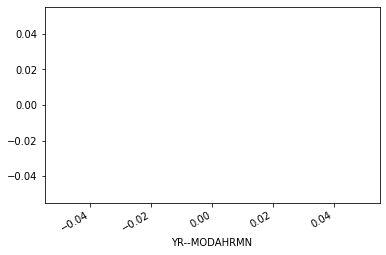

In [ ]:
ax1 = winter_temps.plot()

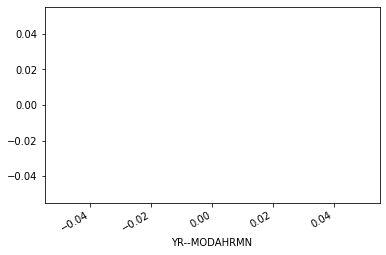

In [ ]:
ax2 = summer_temps.plot()

In [ ]:
min_temp = min(
    winter_temps.min(), spring_temps.min(), summer_temps.min(), autumn_temps.min()
)
min_temp = min_temp - 5.0

# Find upper limit for y-axis
max_temp = max(
    winter_temps.max(), spring_temps.max(), summer_temps.max(), autumn_temps.max()
)
max_temp = max_temp + 5.0

# Print y-axis min, max
print(f"Minimum temperature: {min_temp}")
print(f"Maximum temperature: {max_temp}")

Minimum temperature: nan
Maximum temperature: nan


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

dates = pd.date_range(start="16800101", end="16801201", freq="MS")
temperatures = {
    "Asgard": [
        2.61080759,
        3.80300147,
        6.81951259,
        8.07302111,
        10.92665915,
        13.18569725,
        11.15190422,
        11.88095271,
        8.16883214,
        7.27447255,
        3.43161114,
        2.78345483,
    ],
    "Camelot": [
        6.91054909,
        7.78720085,
        7.69825447,
        12.35036454,
        14.84349615,
        19.77590178,
        19.3768641,
        17.37775864,
        11.06999359,
        9.30251052,
        7.4073777,
        6.61132001,
    ],
    "Nysa": [
        9.97005829,
        13.20188993,
        12.94964658,
        16.57315997,
        21.00721179,
        22.90791358,
        22.53282688,
        19.92502575,
        19.95551156,
        15.53906563,
        10.7195169,
        10.19603786,
    ],
    "Paititi": [
        7.73300265,
        9.85720691,
        18.96796882,
        20.39733145,
        30.67161633,
        35.05950444,
        29.18180578,
        31.1744113,
        16.49727756,
        14.0604099,
        9.07097188,
        9.36868944,
    ],
}

data = pd.DataFrame(index=dates, data=temperatures)

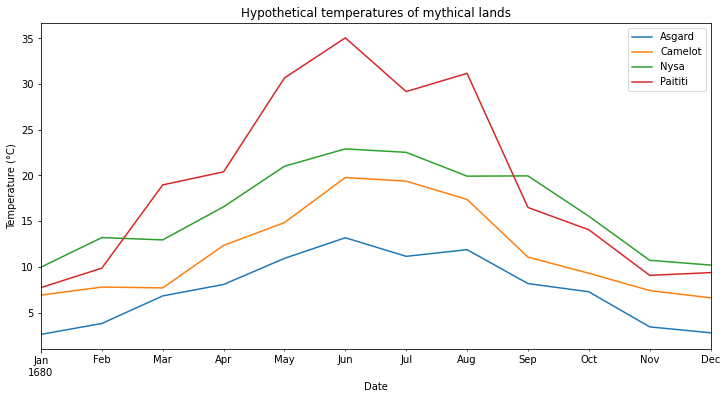

In [ ]:
ax = data.plot(
    xlabel="Date",
    ylabel="Temperature (°C)",
    figsize=(12, 6),
    title="Hypothetical temperatures of mythical lands",
)

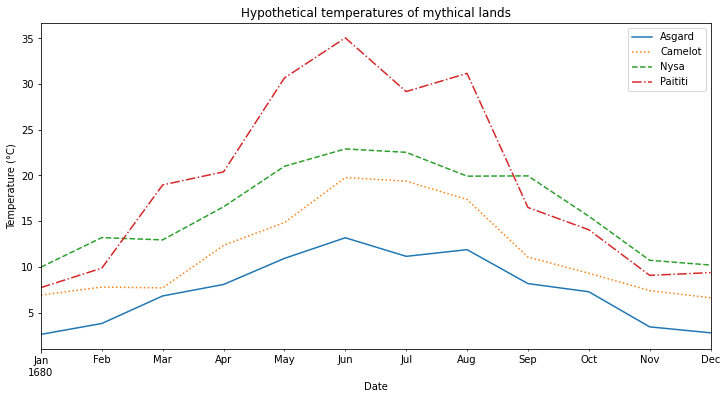

In [ ]:
ax = data.plot(
    style=["-", ":", "--", "-."],
    xlabel="Date",
    ylabel="Temperature (°C)",
    figsize=(12, 6),
    title="Hypothetical temperatures of mythical lands",
);